In [643]:
from scipy import signal
import numpy as np
import pandas as pd
from rpeakdetect import detect_beats, plot_peak_detection
from matplotlib.pyplot import *
import matplotlib as mpl

%matplotlib inline

In [644]:
mpl.rcParams['figure.figsize'] = (14,4)

In [645]:
d = pd.read_csv('data/data_test_2.csv')
d.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Marker
0,1.489531e+09,221.868,-243.922,31.544,27.976,0
1,1.489531e+09,276.435,-315.702,12.714,15.683,0
2,1.489531e+09,319.617,-286.286,5.817,8.551,0
3,1.489531e+09,173.851,-219.444,19.002,22.219,0
4,1.489531e+09,306.750,-301.299,15.880,21.486,0


In [646]:
X = np.array(d.ix[:, 1:5])
ecg = X[:, 0]

In [647]:
## detect sampling rate, should be ~200Hz
fs = 1/np.mean(np.diff(d.timestamps))
print(fs)

199.557996957


/home/pierre/research/neurotech/bci-course/lab6/rpeakdetect.py:75: RuntimeWarning: divide by zero encountered in log
  shannon_energy = -square_decg_power*np.log(square_decg_power)
/home/pierre/research/neurotech/bci-course/lab6/rpeakdetect.py:75: RuntimeWarning: invalid value encountered in multiply
  shannon_energy = -square_decg_power*np.log(square_decg_power)


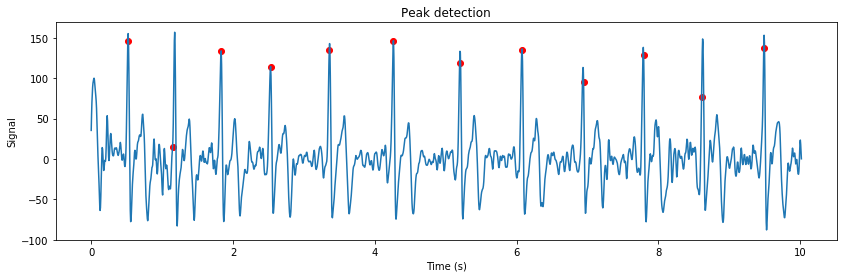

In [648]:
dt = 1.0/fs
t = np.linspace(0, len(ecg)*dt, len(ecg))

bandpass = signal.butter(2, (0.5/(fs/2.0), 20.0/(fs/2.0)), 'bandpass')

ecgf = signal.filtfilt(*bandpass, x=ecg)
peak_i = detect_beats(ecg[:2000], fs)

plot(t[:2000], ecgf[:2000])
scatter(t[peak_i], ecgf[peak_i], color='red')

title('Peak detection')
xlabel('Time (s)')
ylabel('Signal')

In [649]:
beat_ixs = detect_beats(ecg, fs)

/home/pierre/research/neurotech/bci-course/lab6/rpeakdetect.py:75: RuntimeWarning: divide by zero encountered in log
  shannon_energy = -square_decg_power*np.log(square_decg_power)
/home/pierre/research/neurotech/bci-course/lab6/rpeakdetect.py:75: RuntimeWarning: invalid value encountered in multiply
  shannon_energy = -square_decg_power*np.log(square_decg_power)


In [650]:
def movingaverage(sig, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(sig, window, 'valid')

In [651]:
n_avg = 5

In [652]:
bpm = 60 * fs / movingaverage(np.diff(beat_ixs), n_avg)
times = (beat_ixs/fs)[n_avg:]

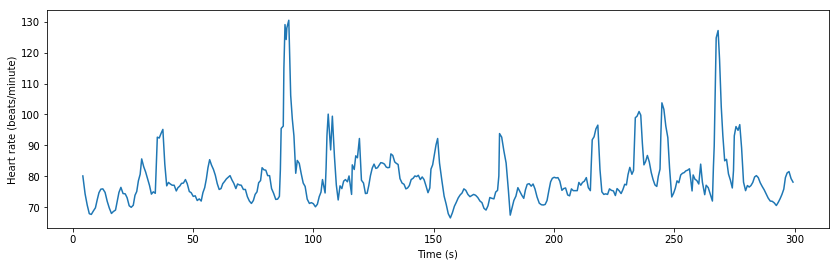

In [653]:
figure(figsize=(14,4))
plot(times, bpm)
xlabel('Time (s)')
ylabel('Heart rate (beats/minute)')

In [654]:
## range of beats / minute
np.max(bpm) - np.min(bpm)

63.836738468327582

In [655]:
## standard deviation of intervals
np.std(np.diff(beat_ixs/fs))

0.12427813689148505

In [656]:
## mean beats / minute
60*fs/np.mean(np.diff(beat_ixs))

79.112392011886826